# Zombie invasjon

Laget av:
- Ernest
- Marthin
- Filip

## Version 1

- Lag først et program der menneskene er trygge mot zombier,og  der  nye  mennesker  kan  komme  til  ved  fødsel  og  (mersannsynlig) innvandring. Lag gjerne ett ledd i likninga sominkluderer begge disse faktorene.

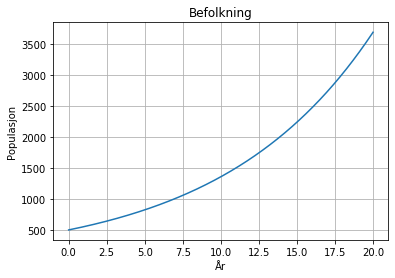

In [2]:
from pylab import *


innvandring = 0.1 # Befolkningen stiger med 10% på grunn av invandring og fødsel
t0 = 0 # Start år
start = 500 # Startsbefolkningen 

#Tidssteg
N = 100000
tid = 20 #Tid i år
dt = tid/(N-1)

#Matriser
t = zeros(N)
P = zeros(N)
Pder = zeros(N)

#Initierer matrisene
t[0] = t0
P[0] = start

#Eulers metode
for i in range (N-1):
    Pder[i] = innvandring * P[i] #Den deriverte av populasjonen på hvert steg
    P[i+1] = P[i] + Pder[i] * dt #Befolkningsantall på hvert steg
    t[i+1] = t[i] + dt #En verdi av tiden på hvert steg
    
#Plotting av graf
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()


1.03 = konstant pa hvor mange som blif født 

## Version 2

- Legg  inn  en  ressursbegrensning  (bæreevne)  for  populasjo-nen. Hvilke faktorer p ̊avirker denne?

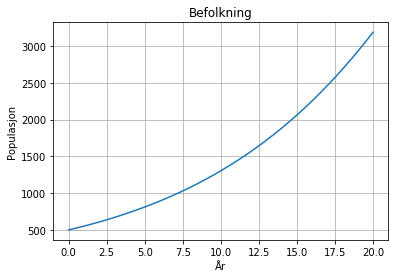

In [4]:
from pylab import *

innvandring = 0.1

t0 = 0
start = 500

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)

t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = innvandring * P[i] * (1-P[i]/20000) #Her har vi satt bærevnen på 20000 mennesker 
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

### Hvilke faktorer påvirker denne?
- Mat
- plass
- vann
På grunn av at det er en zombie apokalypse så er det svært lite tilgang på mat, trygge steder og rent vann. Derfor er bærevnen i Alexandria på 20000 mennesker 

## Version 3

- Menneskene  kan  ogs ̊a  dø  av  sykdom,  skade  og  alderdom(naturlig død). Legg dette inn i modellen, og tenk p ̊a hvorsannsynlig dette er (hvor god er tilgangen p ̊a medisiner, legeo.l.?).

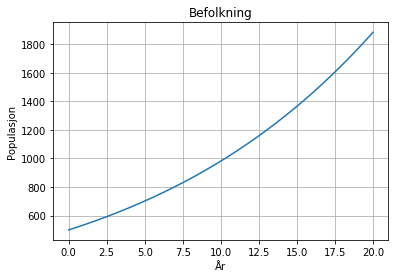

In [5]:
from pylab import *

innvandring = 0.1
død = 0.03 # 3% Av befolkningen dør hvert år 
t0 = 0
start = 500
vekst = innvandring - død #Her har vi lagt til død som en ny faktor til veksten på befolkningen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)


t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000)
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

Det er 1% som dør av alderdom, og 2% som dør av skader, sykdommer og mangel på medisiner hvert år. Tilsammen dør 3% av befolkningen hvert år. 


## Version 4

- Nå skal du legge inn en zombiepopulasjon som lever i nær-heten  av  Alexandria.  Du  kan  selv  bestemme  hvor  mange zombier som finnes og hvor sannsynlig det er at menneskerblir drept av en zombie. Zombiene fungerer som rovdyr, slikat menneskene ikke blir til zombier i denne modellen

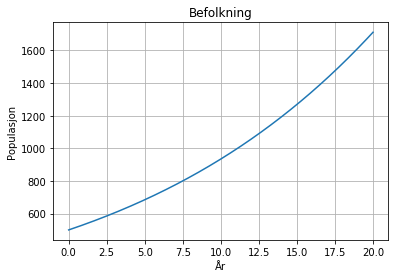

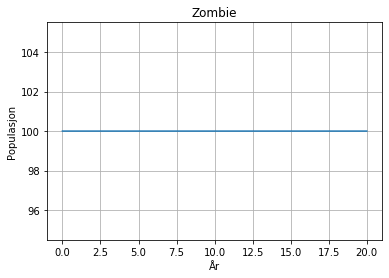

In [4]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100 #Antall zombier på starten
vekst = innvandring - death 
hyppigheten = 0.00005 #Hyppigheten av møter mellom zombier og mennesker 
zombie_vekst_før = 0 #zombie vekst før de kan smitte mennesker (konstant)


#Siden zombier dør ikke av sult, så har vi bestemt oss å ikke ta med justeringen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N) #Ny matrise for populasjonen av zombie
Pder = zeros(N)
Zder = zeros(N) #Ny matrise for den deriverte av zombie populasjonen

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie

#Eulers metode, modell med to arter
for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000) - hyppigheten * P[i] * Z[i]
    Zder[i] = zombie_vekst_før
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt
    t[i+1] = t[i] + dt 

    
#Her plotter vi Populasjon vekst
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Her plotter vi Zombie vekst
plot(t,Z)       
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

## Version 5

-  ̊Na  kan  du  legge  inn  muligheten  for  at  mennesker  blir  tilzombier hvis de blir bitt, men ikke revet i fillebiter. Det vilsi at noen mennesker vil bli smitta, mens andre vil bli dreptav zombiene. De som blir smitta, blir til zombier, og dermedøker zombiepopulasjonen.

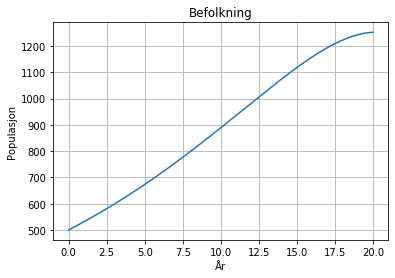

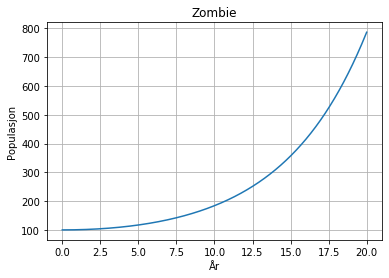

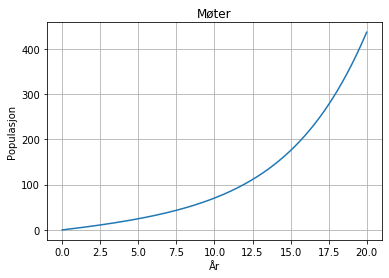

In [2]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100
vekst = innvandring - death 
hyppigheten = 0.0004 #Vi har forandret hyppighet fra 0.00005 til 0.0004 fordi den er mer realistisk 
zombie_vekst_før = 0 #Zombie vekst før de kan smitte mennesker

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N)
Pder = zeros(N)
Zder = zeros(N)
M = zeros(N) #Møter mellom mennesker og Zombie
Pu = zeros(N) #Populasjon av menneseker uten zombie
PuDer = zeros(N) #Den deriverte av populasjonveksten uten Zombie 

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie
M[0] = 0 #Møter mellom zombie og mennesker 
Pu[0] = start_mennesker 

for i in range (N-1):
    Pder[i] = vekst * P[i] * (1-P[i]/20000) - (hyppigheten * P[i] * Z[i])*0.2 #0.2 fordi det er 20% sjanse på at et menneske dør når den møter på en zombie
    Zder[i] = zombie_vekst_før + (M[i] * 0.3) # 0.3 fordi man har 30% sjanser på at man blir smitta når man møter på en zombie
    PuDer[i] = vekst * P[i] * (1-P[i]/20000) 
    M[i+1] =  (Pu[i] + PuDer[i] * dt) - (P[i] + Pder[i] * dt) #Møter mellom zombie er populasjonvekst uten zombie - populasjonvekst med Zombie
    Pu[i+1] = Pu[i] + PuDer[i] * dt 
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt 
    t[i+1] = t[i] + dt 

#Plotter befolkningsvekst
plot(t,P)     
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter Zombievekst
plot(t,Z)
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter møter mellom zombie og mennesker
plot(t,M)
grid()
title("Møter")
xlabel("År")
ylabel("Populasjon")
show()



## Version 6 og 7
- Alexandria kan slå tilbake mot zombiene. Legg inn en faktorsom bidrar til at menneskene kan ta livet av zombier.
-  I  nærheten  av  Alexandria  finner  vi  landsbyene  Hilltop  ogKingdom. Fra disse kan det komme forsterkninger til Alex-andria ved behov. Inkluder dette i modellen din.

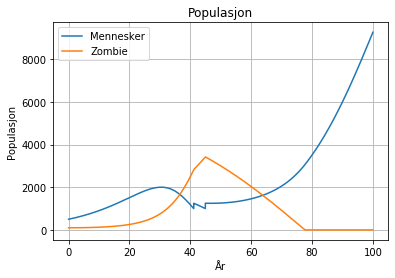

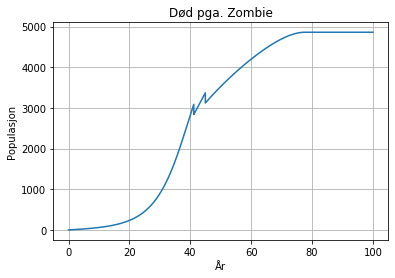

In [3]:

from pylab import *

innvandring = 0.1
death = 0.03
medisiner = 0.9 #medisiner sinker dødsraten med 10%
t0 = 0
start_mennesker = 500
start_zombie = 100
vekst = innvandring - death 
hyppigheten = 0.0004
sjanse_død = 0.2 #0.2 fordi det er 20% sjanse på at et menneske dør når den møter på en zombie
sjanse_smitta = 0.3 # 0.3 fordi man har 30% sjanser på at man blir smitta når man møter på en zombie
sjanse_drap = 0.1  #sjanse for å drepe zombie 
antall_forsterkninger = 250
befolknings_grense = 1000 #Hvis befolkningen dropper under 1000 sa kommer forstarkninger
antall = 0
trening = 0.1

N = 100000
tid = 100
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N)
Pder = zeros(N)
Zder = zeros(N)
D = zeros(N) #Møter mellom mennesker og Zombie
Pu = zeros(N) #Populasjon av menneseker uten zombie
PuDer = zeros(N) 
# Dder = zeros(N)

def forsterkninger():
    global sjanse_død
    global sjanse_drap
    global death
    sjanse_død = sjanse_død * 0.5
    sjanse_drap = sjanse_drap * 1.5
    death = death * medisiner
    vekst = innvandring - death 
    
t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie
D[0] = 0 #Hvor mange som dør pga. Zombie  
Pu[0] = start_mennesker 
# Dder[0] = 0
for i in range (N-1):
    Pder[i] = vekst * P[i] * (1-P[i]/20000) - (hyppigheten * P[i] * Z[i])*sjanse_død 
    Zder[i] = (D[i] * sjanse_smitta) - (D[i] * (sjanse_drap + trening))
    PuDer[i] = vekst * P[i] * (1-P[i]/20000)
    # Dder[i+1] = (D[i+1] - D[i]) / (t[i+1] - t[i])
    D[i+1] =  (Pu[i] + PuDer[i] * dt) - (P[i] + Pder[i] * dt)
    Pu[i+1] = Pu[i] + PuDer[i] * dt 
    P[i+1] = P[i] + Pder[i] * dt
    
    if P[i+1] < P[i] and P[i] <= 1000 and antall < 2 : #Forsterkninger kan komme max to ganger 
        P[i+1] = P[i] + antall_forsterkninger
        forsterkninger()
        antall += 1
        
    Z[i+1] = Z[i] + Zder[i]*dt 
    t[i+1] = t[i] + dt
    
    if Z[i] <= 0:
        Z[i+1] = (Z[i] + Zder[i]*dt) * 0
    
    if death < 0.03:
        medisiner = medisiner * 1.001
    
        
#Plotter befolkningsvekst
plot(t,P, label='Mennesker')
plot(t,Z, label='Zombie')     
grid()
legend()
title("Populasjon")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter hvor mange som dør pga. Zombie
plot(t,D)
grid()
title("Død pga. Zombie")
xlabel("År")
ylabel("Populasjon")
show()



## Tolkning 1

Konstanter:
- Innvandring = 10%
- Dødsrate = 3%
- Medisiner = senker dødsraten med 10%
- Start mennesker = 500
- Start zombie = 100
- Sjanse for død når møte med zombie = 20%
- Sjanse for smitte = 30%
- Sjanse for å drepe zombie = 10%
- Antall forsterkninger = 250
- Befolkningsgrense for forsterkninger = 1000
- Trening for å drepe zombier = 10%
- Tid = 100 år



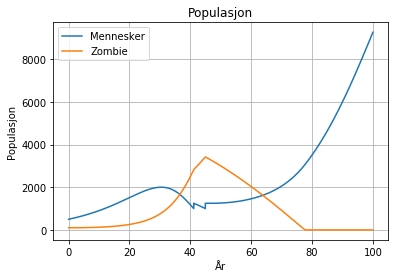
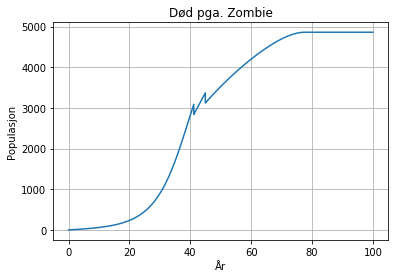
Vi kan se her at menneske populasjonen klarer å stige til ca 2000. Ved dette punktet har det nådd såpass mange zombier at zombiene klarer å drepe flere mennesker enn det kommer og menneske populasjonen synker. I programmet vårt satte vi at om populasjonen går under 1000 vil det kommer forsterkninger fra Alexandria. Når disse forsterkningene kommer øker vi populasjonen med 250 og disse tar samtidig med seg medisiner og kunnskap. Ut ifra grafen kan vi se at dette ikke hjelper og populasjonen går nedover. 
Ved forsterkning nr 2 får de mer kunnskap og bedre medisiner og på grunn av dette begynner menneskene endelig å drepe mer enn de dør av zombiene. På grunn av dette synker zombie bestanden og når til slutt 0. Med konstanene vi har valgt dør ca 5 000 mennesker og menneskene vinner.

## Tolkning når innvandring endres 

Konstanter:
- Innvandring = 20%  Økning fra 10%
- Dødsrate = 3%
- Medisiner = senker dødsraten med 10%
- Start mennesker = 500
- Start zombie = 100
- Sjanse for død når møte med zombie = 20%
- Sjanse for smitte = 30%
- Sjanse for å drepe zombie = 10%
- Antall forsterkninger = 250
- Befolkningsgrense for forsterkninger = 1000
- Trening for å drepe zombier = 10%
- Tid = 100 år

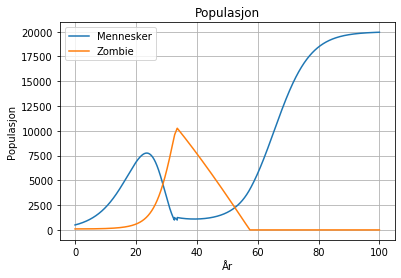
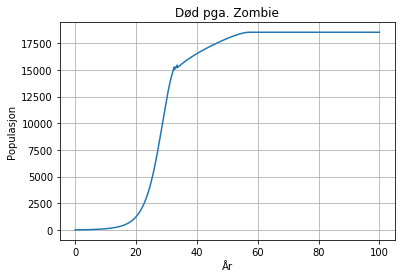

Ved å øke innvandring med 10% kan vi se at det har skjedd en enorm forskjell. På grunn av at det har blitt mennesker har zombiene klart å drepe enda flere mennesker. Dette vises godt ved at mennesker som har blitt drept av zombier har steget til nærmest 18 000 fra ca 5 000.
Menneske populasjonen trenger forstatt to forsterkninger for å klare seg, men på grunn av innvandringen stiger populasjonen til bæreevnen vi satte på 20 000 mennesker.

## Tolkning når vi endrer flere konstanter

Konstanter:
- Innvandring = 10%
- Dødsrate = 2%  -  Senket 1%
- Medisiner = 10% - endret til 5%
- Start mennesker = 1000 - Steget med 500 mennesker
- Start zombie = 10 - sunket med 90 zombier
- Sjanse for død når møte med zombie = 20%
- Sjanse for smitte = 30% - Steget med 10%
- Sjanse for å drepe zombie = 10%
- Antall forsterkninger = 1000 - steget med 750
- Befolkningsgrense for forsterkninger = 1000
- Trening for å drepe zombier = 10%
- Tid = 50 år

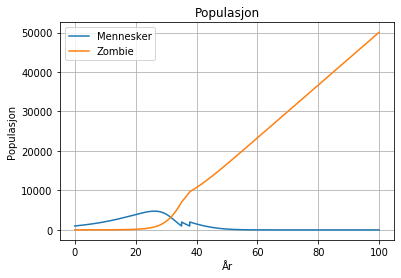
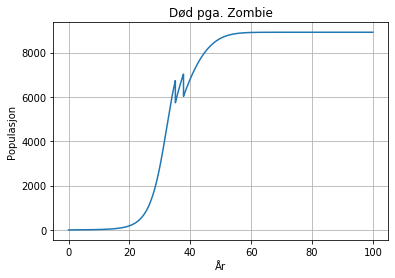

Her har vi senket dødsraten, hevet start mennesker med 500, starter nå med 90 zombier, tilgang på medising har sunket med 5%,  økt forsterkninger til 1000 mennesker, men vi har økt sjansen for å bli smittet med 10% og vi viser nå bare 50 år. Dette viser oss at det har svært lite å si hvor mange mennesker og zombier det starter med og at smittsomheten er en stor faktor. I dette forsøket mottar menneskene forsterkninger 2 ganger til ingen nytte. 
Vi kan også se at 50 år ikke er en optimal graf siden vi aldri får se hva som skjer med menneskene. 